|--- Age <= 44.50
|   |--- Salary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- Salary <= 83500.00
|   |   |   |   |--- Salary <= 67500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Salary >  67500.00
|   |   |   |   |   |--- Salary <= 70500.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Salary >  70500.00
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- Age <= 40.50
|   |   |   |   |   |   |   |   |--- Salary <= 78500.00
|   |   |   |   |   |   |   |   |   |--- Salary <= 76500.00
|   |   |   |   |   |   |   |   |   |   |--- Age <= 38.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Age >  38.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- Salary >  76500.00
|   |   |   |   |   |   |   |   |   |   |--- Age <= 38.50
|   |   |   |   |   |   |  

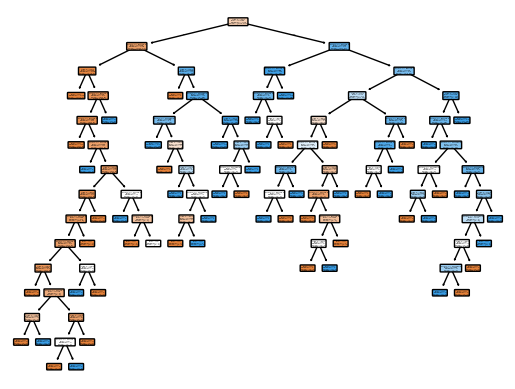

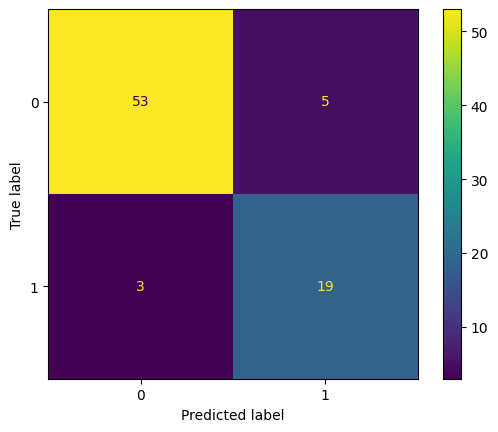

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

purchaseData = pd.read_csv('Purchase_Logistic.csv')

#Dataset
#The dataset contains 400 entries for each of the features
#userId
#gender
#age
#estimatedsalary

#The target is
#purchased history
#The features taken into account are age and estimated salary which are
#required to predict if the user will purchase a new car (1=Yes, 0=No)

X = purchaseData.iloc[:, [2, 3]]
Y = purchaseData.iloc[:, 4]

Xtrain, Xtest, Ytrain, Ytest \
= train_test_split(X, Y, test_size = 0.2, random_state = 0)

cf = DecisionTreeClassifier()
cf.fit(Xtrain, Ytrain)

Ypred = cf.predict(Xtest)

decPlot = plot_tree(decision_tree=cf, feature_names = ["Age", "Salary"],
class_names =["No", "Yes"] , filled = True , precision = 4, rounded = True)


text_representation = tree.export_text(cf,  feature_names = ["Age","Salary"])
print(text_representation)

cmat = confusion_matrix(Ytest, Ypred)
print('Confusion matrix of DTC is \n',cmat,'\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()

DTCscore = accuracy_score(Ypred,Ytest)
print('Accuracy score of DTC is',100*DTCscore,'%\n')